In [34]:
#Import necessary libraries
import plotly as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np

In [35]:
#create dataframe from csv 
breast_cancer_dataframe = pd.read_csv('data.csv')

#get features information
#breast_cancer_dataframe.info()

In [36]:
#extract a few sample data to have a look
breast_cancer_dataframe.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [37]:
#data cleaning step - remove the columns or rows with missing values and the ID as it doesn't have any relevance in anaysis
breast_cancer_df = breast_cancer_dataframe.drop(['id','Unnamed: 32'], axis = 1)

In [38]:
#dropping the column called diagnosis and having a columns of 0 and 1 instead --> 1 for M(Malignant) and 0 for B(Benign)
breast_cancer_df= pd.get_dummies(breast_cancer_df,'diagnosis',drop_first=True) 

#check if new column is added and contains 0 and 1
breast_cancer_df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [43]:
#First Plotly chart - Bar chart to see the count of Malignant and Benign in our data

#create data to feed into the plot - x-axis will hold the name of diagnosis
#and y axis will have the counts according the number of matches found in diagnosis column in our dataframe

color = ['red','green']
data = [go.Bar(x=['Malignant','Benign'],
y=[breast_cancer_dataframe.loc[breast_cancer_dataframe['diagnosis']=='M'].shape[0],
   breast_cancer_dataframe.loc[breast_cancer_dataframe['diagnosis']=='B'].shape[0]],
   marker=dict(color=color) 

)]

#create the layout of the chart by defining titles for chart, x-axis and y-axis
layout = go.Layout(title='Breast Cancer - Diagnosis',
xaxis=dict(title='Diagnosis'),
yaxis=dict(title='Number of people')
)

#Imbed data and layout into charts figure using Figure function
fig = go.Figure(data=data, layout=layout)

#Use plot function of plotly to visualize the data
py.offline.plot(fig)

'file://C:\\Users\\Natasha Sharma\\Documents\\Python Scripts\\temp-plot.html'

In [20]:
#breast_cancer_df.std()

In [21]:
'''
data = [go.Bar(x=breast_cancer_dataframe['radius_mean'],
y= breast_cancer_dataframe['texture_mean'])]

layout = go.Layout(title='Radius Mean v/s Texture Mean',
xaxis=dict(title='Radius Mean '),
yaxis=dict(title='Texture Mean')
)

fig = go.Figure(data=data, layout=layout)
py.offline.plot(fig)
'''

"\ndata = [go.Bar(x=breast_cancer_dataframe['radius_mean'],\ny= breast_cancer_dataframe['texture_mean'])]\n\nlayout = go.Layout(title='Radius Mean v/s Texture Mean',\nxaxis=dict(title='Radius Mean '),\nyaxis=dict(title='Texture Mean')\n)\n\nfig = go.Figure(data=data, layout=layout)\npy.offline.plot(fig)\n"

In [47]:
#Heatmap - to visualize the correlation between features/factors given in the dataset

#calculate the pairwise correlation of columns - Pearson correlation coefficient. 
z = breast_cancer_df.corr()

#use Heatmap function available in plotly and create trace(collection of data) for plot
trace = go.Heatmap(
            x=z.index,       #set x as the feature id/name
            y=z.index,       #set y as the feature id/name
            z=z.values,      #set z as the correlation matrix values, 
                             #these values will be used to show the coloring on heatmap,
                             #which will eventually define which coefficient has more impact or are closly related
            colorscale='Viridis', #colorscale to define different colors for different range of values in correlation matrix
    )

#set the title of the plot
title = "plotting the correlation matrix of the breast cancer dataset"

##create the layout of the chart by defining title for chart, height and width of it
layout = go.Layout(
    title=title,          # set plot title
    autosize=False,       # turn off autosize 
    height=800,           # plot's height in pixels 
    width=800             # plot's height in pixels 
)

#covert the trace into list object before passing thru Figure function
data = go.Data([trace])

#Imbed data and layout into plot using Figure function
fig = go.Figure(data=data, layout=layout)

#Use plot function of plotly to visualize the data
py.offline.plot(fig)

'file://C:\\Users\\Natasha Sharma\\Documents\\Python Scripts\\temp-plot.html'

Plotting Bar Chart and Heatmap using Seaborn library. Seaborn code is a bit less than what we need to code for Plotly but the plot can be more interactive using plotly.

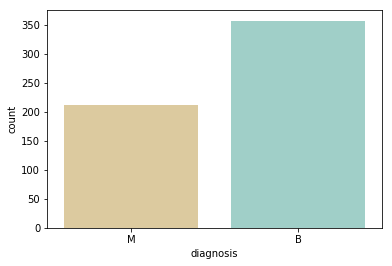

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.countplot(x='diagnosis',data = breast_cancer_dataframe,palette='BrBG')

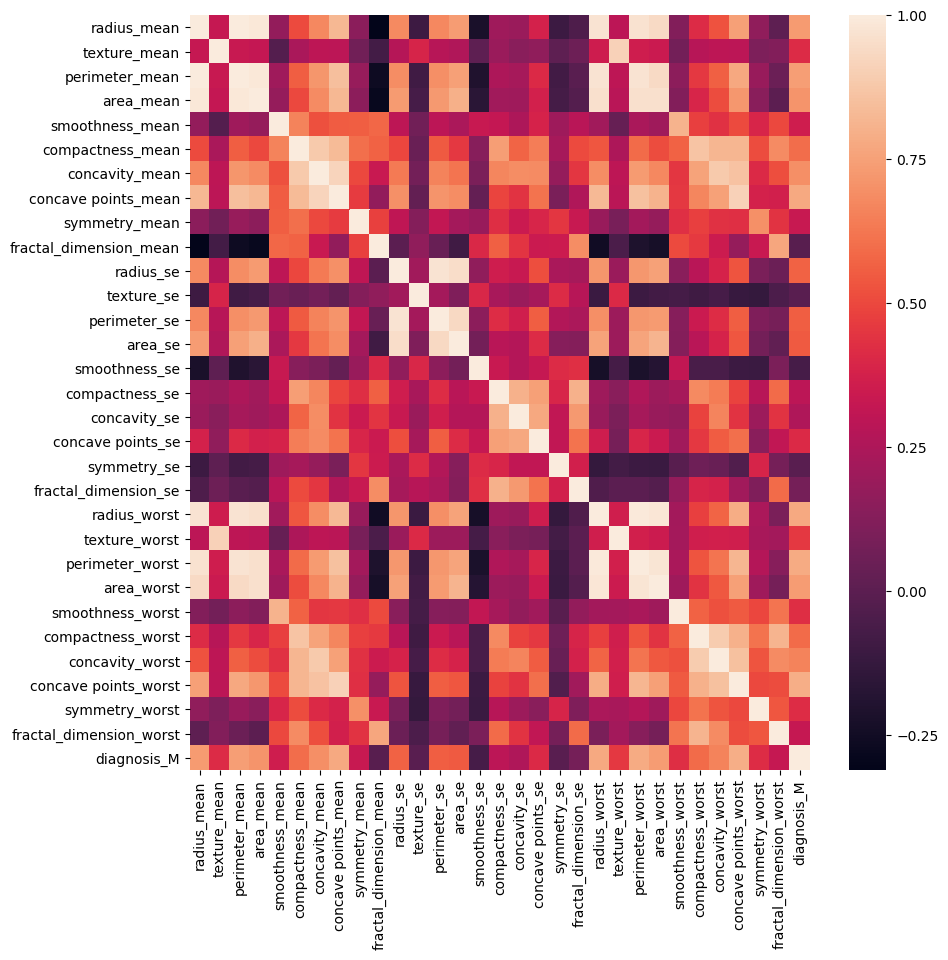

In [44]:
plt.figure(figsize= (10,10), dpi=100)
sns.heatmap(breast_cancer_df.corr())